In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

# Read the CSV file using pandas
df = pd.read_csv("tested.csv")
display(df)
display(df.columns)

# Check for missing values before fillna
display("\nMissing values before fillna:")
display(df.isna().sum())

df.fillna(0, inplace=True)
# Verify changes
display("\nDataFrame after fillna:")
display(df)

display("\nMissing values after fillna:")
display(df.isna().sum())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'\nMissing values before fillna:'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'\nDataFrame after fillna:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


'\nMissing values after fillna:'

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [3]:
# Define features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = df.drop(columns=['Sex', 'Name', 'Embarked', 'Cabin', 'Ticket'])  # Features
Y = df['Age']                 # Target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", Y_train.shape)
print("Testing target shape:", Y_test.shape)

Training features shape: (334, 7)
Testing features shape: (84, 7)
Training target shape: (334,)
Testing target shape: (84,)


In [4]:
# Log transform Age
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
X_train_encoded['Age'] = np.log(X_train_encoded['Age'] + 1)
X_test_encoded['Age'] = np.log(X_test_encoded['Age'] + 1)

In [5]:
print(f"X_train_encoded shape: {X_train_encoded.shape}")
print(f"X_test_encoded shape: {X_test_encoded.shape}")

X_train_encoded shape: (334, 7)
X_test_encoded shape: (84, 7)


In [6]:
# Adding Age-to-Pclass ratio
X_train_encoded['Age_Pclass_ratio'] = X_train_encoded['Age'] / (X_train_encoded['Pclass'] + 1)
X_test_encoded['Age_Pclass_ratio'] = X_test_encoded['Age'] / (X_test_encoded['Pclass'] + 1)

In [7]:
print(f"NaN in X_train_encoded: {X_train_encoded.isna().sum()}")
print(f"Infinite in X_train_encoded: {np.isinf(X_train_encoded).sum()}")

NaN in X_train_encoded: PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Age_Pclass_ratio    0
dtype: int64
Infinite in X_train_encoded: PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Age_Pclass_ratio    0
dtype: int64


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Scaling features
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_encoded)
X_test_scaled = standard_scaler.transform(X_test_encoded)

In [9]:
x_train = X_train_scaled
x_test = X_test_scaled
y_train = Y_train
y_test = Y_test

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (334, 8)
x_test shape: (84, 8)
y_train shape: (334,)
y_test shape: (84,)


In [10]:
from sklearn.linear_model import LinearRegression

# Model training using Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
# Evaluation
score = reg.score(x_test, y_test)
print(f"R squared Score for log(Age): {score}")

R squared Score for log(Age): 0.8304931572293538


In [12]:
print(f"R² Score (train): {reg.score(x_train, y_train)}")
print(f"R² Score (test): {reg.score(x_test, y_test)}")

R² Score (train): 0.851916178331316
R² Score (test): 0.8304931572293538


In [ ]:
# Predictions
y_pred = reg.predict(x_test)
# Display predictions
print(f"Predictions: {y_pred[:10]}")  # Display first 10 predictions


Predictions: [26.89395005 41.91536059 25.26850169 30.37174102 30.57774312 35.44122802
 28.06560962 46.82446022 24.7016454  -1.96538365]



Evaluation DataFrame:


,Actual Age,Predicted Age
321,25.0,26.893950
324,39.0,41.915361
388,21.0,25.268502
56,35.0,30.371741
153,36.0,30.577743
30,50.0,35.441228
72,29.0,28.065610
82,49.0,46.824460
258,19.0,24.701645
416,0.0,-1.965384


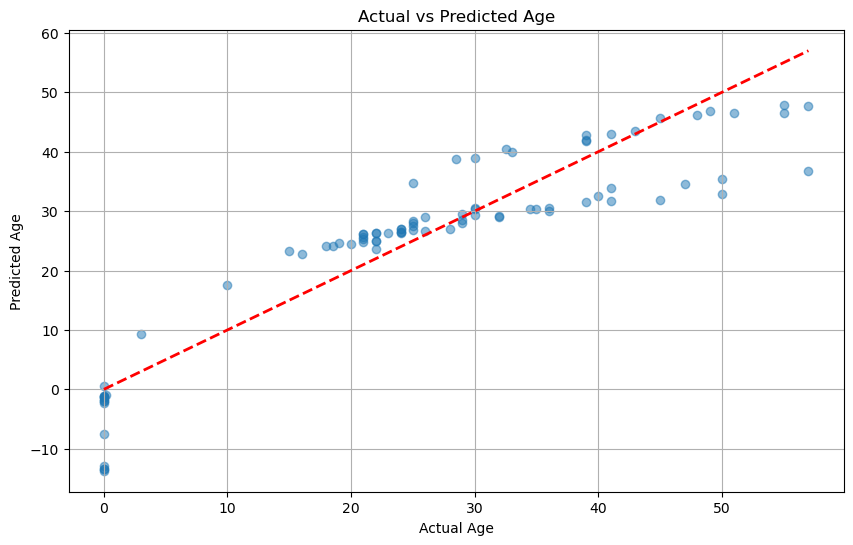

In [15]:
evaluation_df = pd.DataFrame({
    'Actual Age': y_test,
    'Predicted Age': y_pred
})
print("\nEvaluation DataFrame:")
display(evaluation_df.head(10))  # Display first 10 rows of the evaluation DataFrame
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.grid()
plt.show()

In [17]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 43.558069575843284
R² Score: 0.8304931572293538
